In [1]:
import numpy as np

### Implement SVM

In [15]:
class SVM:
    def __init__(self, lr=0.001, lambda_cost=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_cost = lambda_cost
        self.w = None
        self.b = None
        self.n_iters = n_iters
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        #replace all the elements in the array which are less than 0 with -1 and all other elements 1
        y_ = np.where(y <= 0, -1, 1)
        
        #initialize weight vector and bias
        self.w = np.zeros(n_features)
        self.b = 0
        
        #for the given no. of iterations, iterate over each data point of X
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                
                #if the current data point satisifes the hinge loss condition then update the weights (bias remains the same)
                if condition:
                    self.w -= self.lr * (2 * self.lambda_cost * self.w)
                    
                #if the condition is not satisfied, update the misclassifications
                else:
                    self.w -= self.lr * (2 * self.lambda_cost * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    
    def predict(self, X):
        value = np.dot(X, self.w) - self.b
        return np.sign(value)

### Import the data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=300, centers=2, random_state=0)

#replace all the elements in the array which are less than 0 with -1 and all other elements 1
y = np.where(y == 0, -1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

classifier = SVM()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

### Find the accuracy

In [44]:
def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

print("Accuracy:",accuracy(y_test,predictions))

Accuracy: 0.9666666666666667


### Visualize the SVM

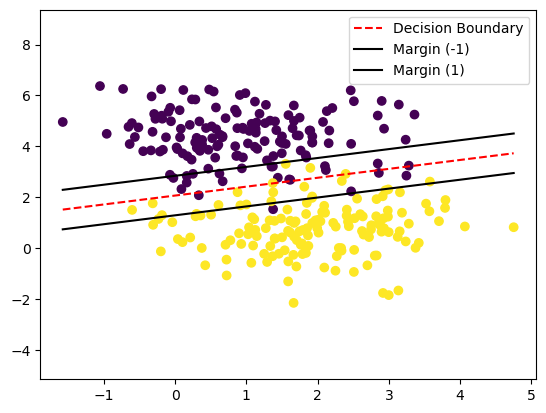

In [66]:
def visualize_svm(X, y, classifier):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x_range = np.linspace(np.amin(X[:, 0]), np.amax(X[:, 0]), 100)
    y_range = get_hyperplane_value(x_range, classifier.w, classifier.b, 0)
    ax.plot(x_range, y_range, "r--", label="Decision Boundary")

    for offset in [-1, 1]:
        y_range_m = get_hyperplane_value(x_range, classifier.w, classifier.b, offset)
        ax.plot(x_range, y_range_m, "k", label=f"Margin ({offset})")

    x1_min, x1_max = np.amin(X[:, 1]), np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    ax.legend()
    plt.show()

visualize_svm(X, y, classifier)
